In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torchvision import (models, transforms)
import os
import utils
from pathlib import Path
import trainer
from torchinfo import summary
import time
import matplotlib.pyplot as plt
import numpy as np

device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

/home/p3rzival/.local/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


'cuda'

In [2]:
torch.manual_seed(0)
torch.cuda.manual_seed(0)

In [3]:
pretrained_vit_weights = torchvision.models.ViT_B_16_Weights.DEFAULT
vit_default = utils.load_default_model()
pretrained_vit_transforms = pretrained_vit_weights.transforms()

#We freeze all layers since we do not really want to train it again
for parameter in vit_default.parameters():
    parameter.requires_grad = False

loss_fn = nn.CrossEntropyLoss()

In [4]:
import torch
from torchao.quantization.quant_api import quantize_, int8_dynamic_activation_int8_weight
from torchao.utils import unwrap_tensor_subclass, TORCH_VERSION_AT_LEAST_2_5
from torch.utils.benchmark import Timer

vit_quantized = vit_default.to(torch.bfloat16)
_, _, val_dl, _ = utils.create_loaders("data", transform=pretrained_vit_transforms, batch_size=128, dtype=torch.bfloat16)

Files already downloaded and verified


In [5]:
utils.save_model(vit_quantized, "model", "ViT-Quantized-bfloat16.pth")

[INFO] Saving model to: model/ViT-Quantized-bfloat16.pth


In [6]:
#trainer.evaluate(vit_quantized, val_dl, loss_fn, device)

Files already downloaded and verified
Doing warm-up runs...
Ended warm-up, beginning true runs...


 23%|██▎       | 456/2000 [02:05<07:12,  3.57it/s]Traceback (most recent call last):
  File "/usr/lib/python3.11/multiprocessing/util.py", line 303, in _run_finalizers
    finalizer()
  File "/usr/lib/python3.11/multiprocessing/util.py", line 227, in __call__
    res = self._callback(*self._args, **self._kwargs)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/multiprocessing/util.py", line 136, in _remove_temp_dir
    rmtree(tempdir, onerror=onerror)
  File "/usr/lib/python3.11/shutil.py", line 763, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/usr/lib/python3.11/shutil.py", line 761, in rmtree
    os.rmdir(path, dir_fd=dir_fd)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-w_m6bgsp'
 36%|███▌      | 715/2000 [03:16<05:52,  3.64it/s]Traceback (most recent call last):
  File "/usr/lib/python3.11/multiprocessing/util.py", line 303, in _run_finalizers
    finalizer()
  File "/usr/lib/python3.11/multiprocessing/util.py", line 227, in 

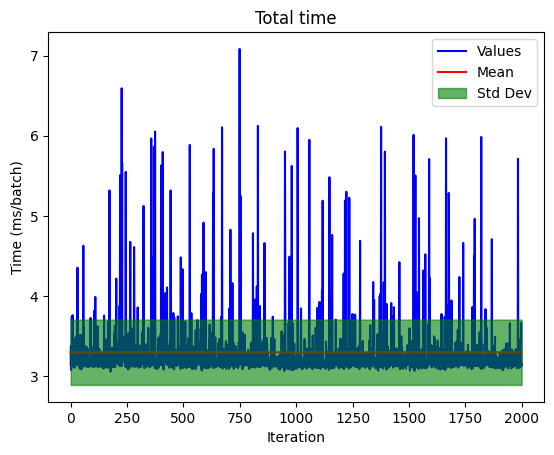

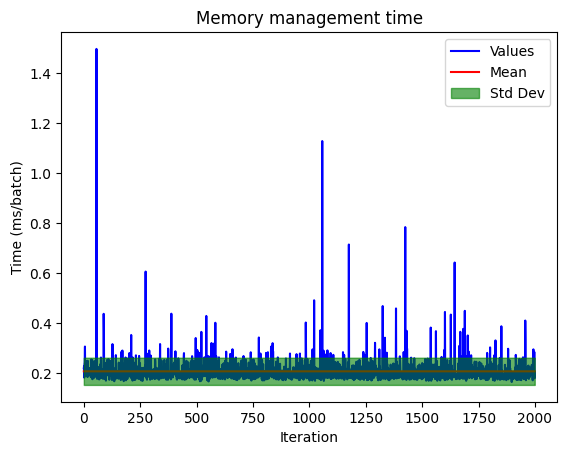

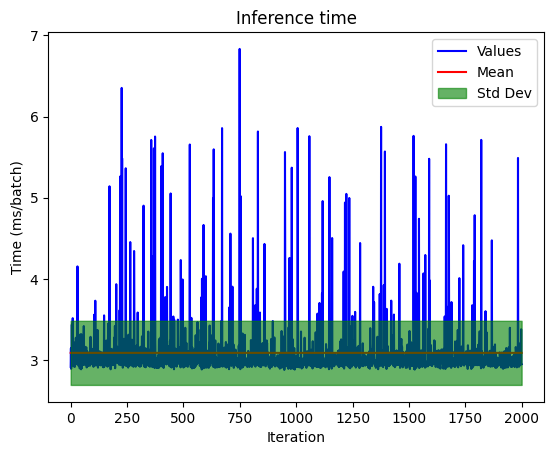

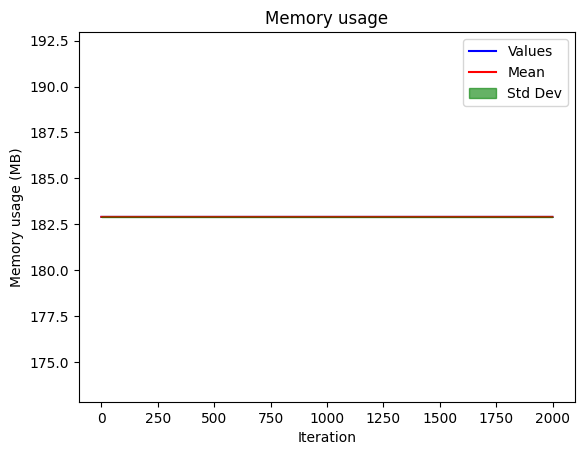

Mean total time over 2000 executions: 3.2975852489471436 ms/batch 
Mean memory time over 2000 executions: 0.2077852487564087 ms/batch 
Mean inference time over 2000 executions: 3.089800000190735 ms/batch 
Mean memory over 2000 executions: 182.9033203125 MB


In [7]:
torch.manual_seed(0)
torch.cuda.manual_seed(0)
_, _, val_dl, _ = utils.create_loaders("data", transform=pretrained_vit_transforms, batch_size=1, dtype=torch.bfloat16)
metrics = trainer.getMetrics(vit_quantized, val_dl, device, num_times=2000, save_plots=True, model_title='ViT-Quantized')